In [127]:
import pandas as pd
import numpy as np

# Load a Data Set

We used the Iris dataset from https://archive.ics.uci.edu/

In [128]:
features = ["Buying", "Maintenaince", "Doors", "Persons", "Luggage", "Safety"]
target = 'Class'

In [129]:
df = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=features + [target])

# Visualising the data

In [111]:
df.head()

,Buying,Maintenaince,Doors,Persons,Luggage,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [122]:
df.tail()

,Buying,Maintenaince,Doors,Persons,Luggage,Safety,Class
1723,1,1,5more,more,1,2,1
1724,1,1,5more,more,1,0,3
1725,1,1,5more,more,0,1,2
1726,1,1,5more,more,0,2,1
1727,1,1,5more,more,0,0,3


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Buying          1728 non-null object
Maintenaince    1728 non-null object
Doors           1728 non-null object
Persons         1728 non-null object
Luggage         1728 non-null object
Safety          1728 non-null object
Class           1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [113]:
df.describe()

,Buying,Maintenaince,Doors,Persons,Luggage,Safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,4,big,low,unacc
freq,432,432,432,576,576,576,1210


In [114]:
df.dtypes

Buying          object
Maintenaince    object
Doors           object
Persons         object
Luggage         object
Safety          object
Class           object
dtype: object

In [115]:
import seaborn as sns

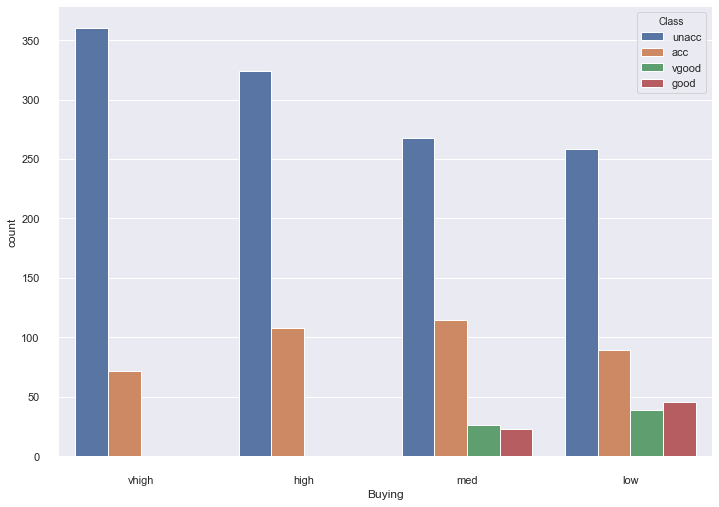

In [116]:
#Set background colour to white 
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('Buying', data=df, hue = 'Class')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
plt.show()

# Preprocessing the data

In [117]:
from sklearn import preprocessing

In [118]:
le = preprocessing.LabelEncoder()

In [135]:
#convert the categorical columns into numeric (= all columns)

df = df.apply(le.fit_transform)

#display the initial records
df.head()

,Buying,Maintenaince,Doors,Persons,Luggage,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Buying          1728 non-null int64
Maintenaince    1728 non-null int64
Doors           1728 non-null int64
Persons         1728 non-null int64
Luggage         1728 non-null int64
Safety          1728 non-null int64
Class           1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


# Divide into training and test data

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
train_data, test_data = train_test_split(df, test_size=0.2)

# K-Nearest-Neighbour

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [147]:
#create object of the classifier
model = KNeighborsClassifier(n_neighbors = 15).fit(train_data, train_data[target])

In [153]:
predict =  model.predict(test_data)
model.score(test_data, test_data[target])

0.9971098265895953

In [148]:

# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(test_data[target], pred))

KNeighbors accuracy score :  0.9971098265895953


# This is where I ended

Note that we can specify values for a complete set $\{ f(x) \mid x \in X\}$ with the syntax  `[f[i] for x in X]` as shown below.

In [72]:
models = [KNeighborsClassifier(n_neighbors = 5).fit(train_data[[f]], train_data[target]) for f in features]


ValueError: could not convert string to float: '5more'

### Calculate the accurancy scores

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

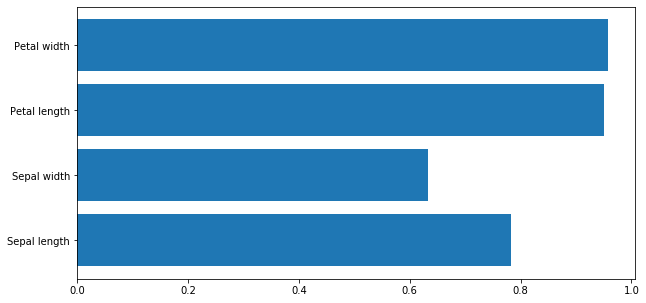

In [21]:
train_scores = [accuracy_score(train_data[target], m.predict(train_data[[f]])) for m, f in zip(models, features)]
plt.barh(range(len(features)), train_scores)
plt.yticks(range(len(features)), features)
plt.gcf().set_size_inches(10, 5)
None

In [22]:
train_scores

[0.7833333333333333, 0.6333333333333333, 0.95, 0.9583333333333334]

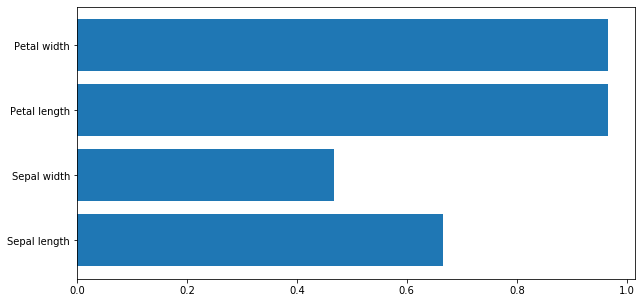

In [23]:
scores = [accuracy_score(test_data[target], m.predict(test_data[[f]])) for m, f in zip(models, features)]
plt.barh(range(len(features)), scores)
plt.yticks(range(len(features)), features)
plt.gcf().set_size_inches(10, 5)

# Which k Should You Choose?

In [24]:
from sklearn.preprocessing import StandardScaler

In [27]:
data_scaled = pandas.DataFrame(StandardScaler().fit_transform(df[features]), columns=features)
data_scaled[target] = df[target]

In [28]:
train_data_s, test_data_s = train_test_split(data_scaled, test_size=0.2)

In [29]:
N, _ = train_data_s.shape
N_test, _ = test_data_s.shape

In [30]:
ks = range(1, 100)
models = [KNeighborsClassifier(n_neighbors=k).fit(train_data_s[features], train_data_s[target]) for k in ks]
train_scores = [accuracy_score(train_data_s[target], m.predict(train_data_s[features])) for m in models]
test_scores = [accuracy_score(test_data_s[target], m.predict(test_data_s[features])) for m in models]

# Test score performance

Were we omniscient, we could just look at the test scores. These the performance of model $\lambda(k, D_T)$ on $D^*$. From the plot below we can see that almost any value below 90 or so works pretty well. We also see a discrepancy between the maximising values in the training and test set. The best value for the training set is simply $k = 1$. However good test set values occur starting from $k=3$.

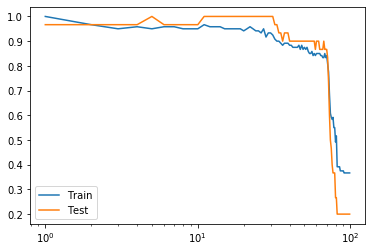

In [31]:
plt.semilogx(ks, train_scores, ks, test_scores);
plt.legend(["Train", "Test"])

## Cross validation to choose $k$


In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
neighbor_ks = range(1, 100)
untrained_models = [KNeighborsClassifier(n_neighbors=k) for k in neighbor_ks]

In [34]:
k_fold_scores = [cross_val_score(estimator=m, X=data_scaled[features], y=data_scaled[target], cv=10) for m in untrained_models]

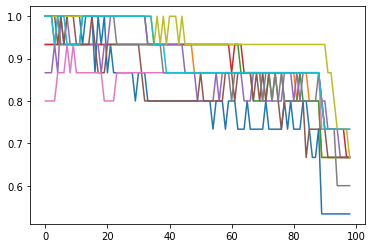

In [35]:
plt.plot(k_fold_scores)

None

<ErrorbarContainer object of 3 artists>

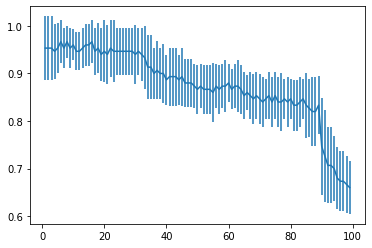

In [36]:
mean_xv_scores = [s.mean() for s in k_fold_scores] 
plt.errorbar(neighbor_ks, mean_xv_scores, yerr=[s.std() for s in k_fold_scores])


8 1 5


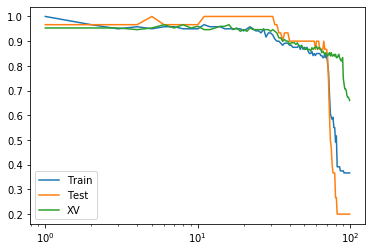

In [37]:
# now let us compare the best values for training test and cross validation

import numpy
knn_best_k_xv = numpy.asarray(mean_xv_scores).argmax()
knn_best_k_train = numpy.asarray(train_scores).argmax()
knn_best_k_test = numpy.asarray(test_scores).argmax()
print(ks[knn_best_k_xv], ks[knn_best_k_train], ks[knn_best_k_test])
plt.semilogx(ks, train_scores, ks, test_scores, ks, mean_xv_scores)
plt.legend(["Train", "Test", "XV"])

# Let's select the best model on the basis of the XV score, as we must, since the 'test' result is invisible to us
knn_best_model_xv = models[knn_best_k_xv]